## 汇率查询 API

In [5]:
import requests

def fetch_all_rates(base_currency: str, api_key: str = None) -> dict:
    """
    调用 ExchangeRate-API 的标准端点，获取指定基准货币对所有支持货币的最新汇率。

    :param base_currency: ISO 4217 格式的基准货币代码，例如 "USD"。
    :param api_key: （可选）如果你注册了付费或需要 API Key 的方案，将其填入。
    :return: 返回一个字典，键为目标货币代码，值为汇率（1 base_currency = rate 目标货币）。
    """
    # 标准端点，不同方案无需或可选 api_key 参数
    url = f"https://api.exchangerate-api.com/v4/latest/{base_currency}"
    params = {}
    if api_key:
        params["apiKey"] = api_key  # 某些方案可能需要
    resp = requests.get(url, params=params, timeout=10)
    resp.raise_for_status()
    data = resp.json()
    # 返回 data["rates"]，格式如 {"EUR":0.91, "JPY":145.3, ...}
    return data["rates"]

if __name__ == "__main__":
    base = "CNY"
    rates = fetch_all_rates(base)
    # 打印部分示例
    print(f"Base currency: {base}")
    print(f"Last updated: {rates.get('time_last_updated', 'N/A')}")  # 如果想看更新时间，可从原始 JSON 中打印
    for curr, rate in rates.items():
        print(f"{curr}: {rate}")


Base currency: CNY
Last updated: N/A
CNY: 1
AED: 0.512
AFN: 9.76
ALL: 11.6
AMD: 53.62
ANG: 0.25
AOA: 131.12
ARS: 172.97
AUD: 0.213
AWG: 0.25
AZN: 0.237
BAM: 0.232
BBD: 0.279
BDT: 17.11
BGN: 0.232
BHD: 0.0525
BIF: 417.23
BMD: 0.14
BND: 0.178
BOB: 0.967
BRL: 0.755
BSD: 0.14
BTN: 11.92
BWP: 1.85
BYN: 0.424
BZD: 0.279
CAD: 0.19
CDF: 405.3
CHF: 0.111
CLP: 129.67
COP: 559.09
CRC: 70.49
CUP: 3.35
CVE: 13.07
CZK: 2.92
DJF: 24.79
DKK: 0.884
DOP: 8.33
DZD: 18.11
EGP: 6.89
ERN: 2.09
ETB: 19.26
EUR: 0.119
FJD: 0.313
FKP: 0.102
FOK: 0.884
GBP: 0.102
GEL: 0.38
GGP: 0.102
GHS: 1.52
GIP: 0.102
GMD: 10.15
GNF: 1212.13
GTQ: 1.07
GYD: 29.21
HKD: 1.1
HNL: 3.65
HRK: 0.893
HTG: 18.33
HUF: 47.3
IDR: 2260.03
ILS: 0.466
IMP: 0.102
INR: 11.92
IQD: 182.65
IRR: 5923.5
ISK: 16.88
JEP: 0.102
JMD: 22.3
JOD: 0.0989
JPY: 20.16
KES: 18.04
KGS: 12.2
KHR: 559.96
KID: 0.213
KMF: 58.31
KRW: 190.26
KWD: 0.0424
KYD: 0.116
KZT: 72.56
LAK: 3022.03
LBP: 12486.01
LKR: 41.87
LRD: 27.99
LSL: 2.45
LYD: 0.752
MAD: 1.25
MDL: 2.35
MGA

| 方式                              | 优点                                        | 缺点                                       | 典型费用/备注                                              |
| ------------------------------- | ----------------------------------------- | ---------------------------------------- | ---------------------------------------------------- |
| **1. 银行柜台／网点（如工行、建行、农行等）**      | - 安全可靠、有官方监管<br/>- 可一次性兑换大额现金             | - 汇率买卖差一般较大（≈2%–3%）<br/>- 排队时间长、营业时间限制   | - 买入价 vs 卖出价差 ≈2%–3%<br/>- 办理时需出示身份证，柜台限额：等值 5 万美元/年 |
| **2. 网上银行／手机银行预约（提前预约柜台取现）**    | - 可在线比价、预约到店取现<br/>- 避免到现场排长队             | - 仍受汇率差影响<br/>- 需提前 1–2 个工作日预约、限额和次数有限   | - 同柜台汇率，但可能享少量优惠（≈0.1%–0.2%）                         |
| **3. 支付宝国际／微信国际支付**             | - 小额快捷，直接在 App 中完成；部分商家、航空公司可直接用人民币支付外币费用 | - 仅限合作商家、平台；不能自由换取现金<br/>- 汇率相对市场价略高     | - 汇率＋1% 服务费左右<br/>- 无额外提现功能                          |
| **4. 线上换汇平台（Wise、Revolut 等）**   | - 费率透明，接近中间市场价<br/>- 支持多币种、国际电汇到账速度快      | - 中国居民使用有所限制（需港澳/海外账户）<br/>- 大额到账需做外汇申报  | - 手续费 ≈0.3%–0.5%<br/>- 需通过境外账户操作                     |
| **5. 持牌兑换商（如杭州解百、上海中福、北京秀水街等）** | - 现金即时拿到<br/>- 多家可线下比价，汇率比银行稍优            | - 需跑多家比价<br/>- 用现金交易，安全需自行注意             | - 汇率差 ≈1%–1.5%<br/>- 建议先电话/微信询价当日牌价                  |
| **6. 机场银行／兑换柜台**                | - 24 小时/紧急时可换<br/>- 不需预约                  | - 汇率最差，手续费最高<br/>- 只作应急                  | - 汇率差常在 4%–6% 以上                                     |
| **7. 境外 ATM 取现**                | - 到达后直接取现非常方便<br/>- 支持当地实时汇率              | - 中国银行卡境外取现手续费高<br/>- 有取现上限（≅2000 元/日）   | - 本行手续费 3%＋固定 5–10 元/笔<br/>- 当地 ATM 可能再收方手续费         |
| **8. P2P／熟人兑换**                 | - 有时能拿到更接近中间价的汇率<br/>- 灵活、私下交易            | - 风险高、需完全信任对方<br/>- 合规性存疑，可能触犯外汇管理法规     | - 约定费率，看双方议价；但无正式票据                                  |
| **9. 数字货币兑换＋提现**                | - 24/7 市场，汇率灵活<br/>- 可以跨境快速转账             | - 价格波动大<br/>- 需通过交易所 KYC；提现到法币再换成当地现金或卡账 | - 交易所手续费 ≈0.1%–0.2%<br/>- 监管与提现渠道费各异                 |


## 获取汇率变化

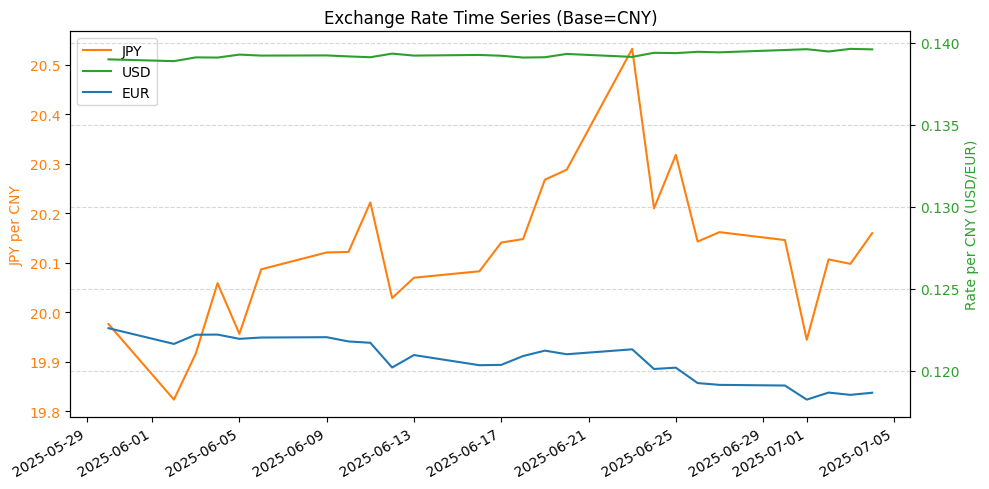

In [5]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

def fetch_timeseries_frankfurter(base: str, symbols: list, start: str, end: str) -> pd.DataFrame:
    """
    使用 Frankfurter API 获取历史汇率时间序列，并返回 DataFrame。
    每行索引为日期，列为各目标货币的汇率（1 base = X 目标币）。
    无需 API Key。
    """
    url = f"https://api.frankfurter.app/{start}..{end}"
    params = {
        "from": base,
        "to": ",".join(symbols)
    }
    resp = requests.get(url, params=params, timeout=10)
    resp.raise_for_status()
    data = resp.json()
    if not data.get("rates"):
        raise RuntimeError(f"No rates returned: {data}")
    df = pd.DataFrame.from_dict(data["rates"], orient="index")
    df.index = pd.to_datetime(df.index)
    df.sort_index(inplace=True)
    return df

if __name__ == "__main__":
    # 参数设置
    base_currency = "CNY"                  # 基准货币
    targets       = ["USD", "EUR", "JPY"]  # 关注的目标货币列表
    start_date    = "2025-06-01"           # 起始日期 (YYYY-MM-DD)
    end_date      = "2025-07-06"           # 结束日期 (YYYY-MM-DD)

    # 1. 获取历史汇率数据
    df_rates = fetch_timeseries_frankfurter(base_currency, targets, start_date, end_date)

    # 2. 绘制双 Y 轴曲线
    fig, ax1 = plt.subplots(figsize=(10, 5))

    # 左轴：JPY
    ax1.plot(df_rates.index, df_rates["JPY"], color="C1", label="JPY")
    ax1.set_ylabel("JPY per CNY", color="C1")
    ax1.tick_params(axis="y", labelcolor="C1")

    # 右轴：USD & EUR
    ax2 = ax1.twinx()
    ax2.plot(df_rates.index, df_rates["USD"], color="C2", label="USD")
    ax2.plot(df_rates.index, df_rates["EUR"], color="C0", label="EUR")
    ax2.set_ylabel("Rate per CNY (USD/EUR)", color="C2")
    ax2.tick_params(axis="y", labelcolor="C2")

    # 合并图例
    lines = ax1.get_lines() + ax2.get_lines()
    labels = [line.get_label() for line in lines]
    ax1.legend(lines, labels, loc="upper left")

    plt.title(f"Exchange Rate Time Series (Base={base_currency})")
    plt.xlabel("Date")
    plt.gcf().autofmt_xdate()
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()


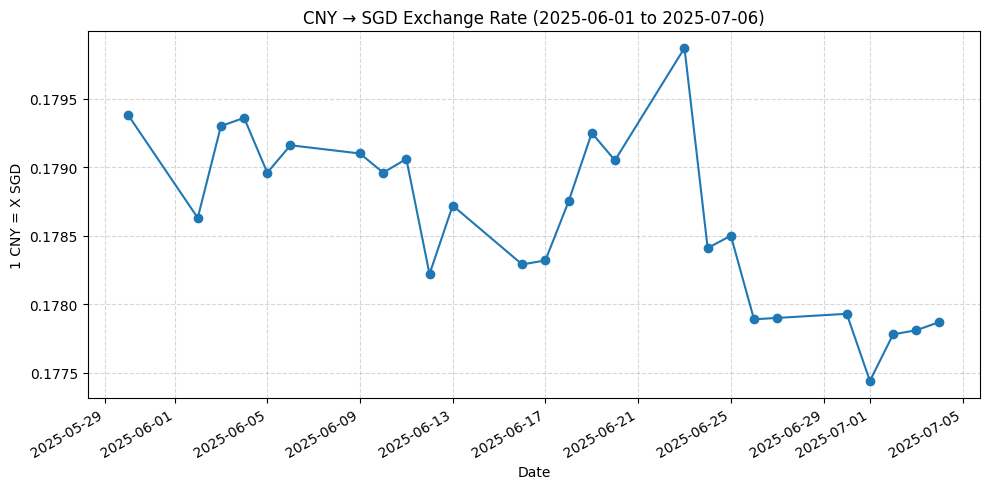

In [6]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

def fetch_timeseries_frankfurter(base: str, symbols: list, start: str, end: str) -> pd.DataFrame:
    """
    使用 Frankfurter API 获取历史汇率时间序列，并返回 DataFrame。
    行索引为日期，列为各目标货币的汇率（1 base = X 目标币）。
    无需 API Key。
    """
    url = f"https://api.frankfurter.app/{start}..{end}"
    params = {
        "from": base,
        "to": ",".join(symbols)
    }
    resp = requests.get(url, params=params, timeout=10)
    resp.raise_for_status()
    data = resp.json()
    rates = data.get("rates", {})
    if not rates:
        raise RuntimeError(f"No rates returned: {data}")
    df = pd.DataFrame.from_dict(rates, orient="index")
    df.index = pd.to_datetime(df.index)
    df.sort_index(inplace=True)
    return df

if __name__ == "__main__":
    # 参数设置
    base_currency = "CNY"          # 基准货币：人民币
    targets       = ["SGD"]        # 目标货币：新加坡元
    start_date    = "2025-06-01"   # 起始日期
    end_date      = "2025-07-06"   # 结束日期

    # 1. 获取历史汇率数据
    df_rates = fetch_timeseries_frankfurter(base_currency, targets, start_date, end_date)

    # 2. 绘制折线图
    plt.figure(figsize=(10, 5))
    plt.plot(df_rates.index, df_rates["SGD"], marker="o", linestyle="-")
    plt.title(f"{base_currency} → SGD Exchange Rate ({start_date} to {end_date})")
    plt.xlabel("Date")
    plt.ylabel("1 CNY = X SGD")
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.gcf().autofmt_xdate()
    plt.tight_layout()
    plt.show()


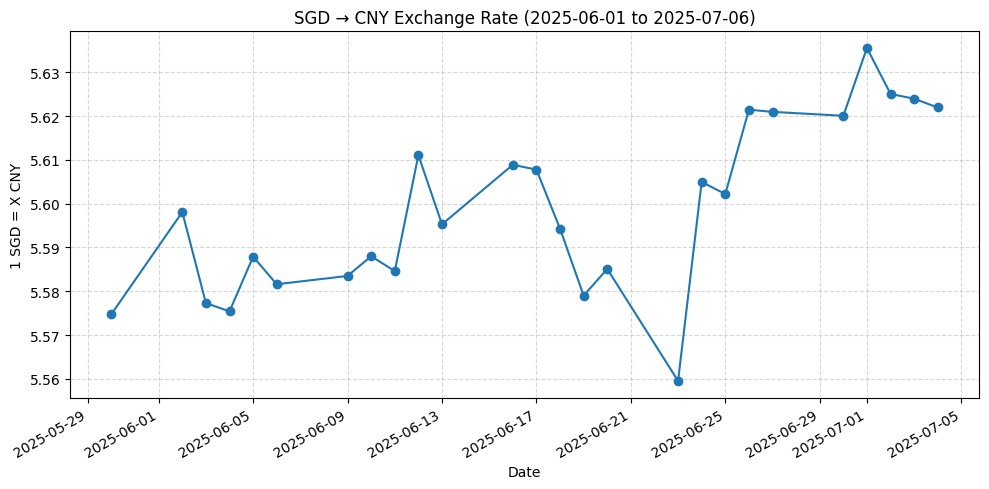

In [8]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

def fetch_timeseries_frankfurter(base: str, symbols: list, start: str, end: str) -> pd.DataFrame:
    """
    使用 Frankfurter API 获取历史汇率时间序列，并返回 DataFrame。
    行索引为日期，列为各目标货币的汇率（1 base = X 目标币）。
    无需 API Key。
    """
    url = f"https://api.frankfurter.app/{start}..{end}"
    params = {
        "from": base,
        "to": ",".join(symbols)
    }
    resp = requests.get(url, params=params, timeout=10)
    resp.raise_for_status()
    data = resp.json()
    rates = data.get("rates", {})
    if not rates:
        raise RuntimeError(f"No rates returned: {data}")
    df = pd.DataFrame.from_dict(rates, orient="index")
    df.index = pd.to_datetime(df.index)
    df.sort_index(inplace=True)
    return df

if __name__ == "__main__":
    # 参数设置
    base_currency = "SGD"          # 基准货币：人民币
    targets       = ["CNY"]        # 目标货币：新加坡元
    start_date    = "2025-06-01"   # 起始日期
    end_date      = "2025-07-06"   # 结束日期

    # 1. 获取历史汇率数据
    df_rates = fetch_timeseries_frankfurter(base_currency, targets, start_date, end_date)

    # 2. 绘制折线图
    plt.figure(figsize=(10, 5))
    plt.plot(df_rates.index, df_rates["CNY"], marker="o", linestyle="-")
    plt.title(f"{base_currency} → CNY Exchange Rate ({start_date} to {end_date})")
    plt.xlabel("Date")
    plt.ylabel("1 SGD = X CNY")
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.gcf().autofmt_xdate()
    plt.tight_layout()
    plt.show()
